In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('../dataset/Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.shape

(400, 5)

In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df=df.iloc[:,2:]

In [10]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [11]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(['Purchased'],axis=1),
                                               df['Purchased'],
                                               test_size=0.2,
                                              random_state=0)

In [27]:
X_train

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [28]:
X_train.shape

(320, 2)

In [29]:
X_test


,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
14,18,82000
363,42,79000
304,40,60000
361,53,34000


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# fit the scaler to the train set it will learn the parameaters
scaler.fit(X_train)
#transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
X_train_scaled

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [33]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [34]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [36]:
X_train_scaled

,Age,EstimatedSalary
0,1.922950,2.146016
1,2.020161,0.378719
2,-1.382215,-0.432499
3,-1.187794,-1.011940
4,1.922950,-0.925024
...,...,...
315,0.950843,-1.156800
316,-0.896162,-0.780164
317,-0.215686,-0.519415
318,-1.090583,-0.461471


In [40]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


## Effect of the scalling

Text(0, 0.5, 'Salary')

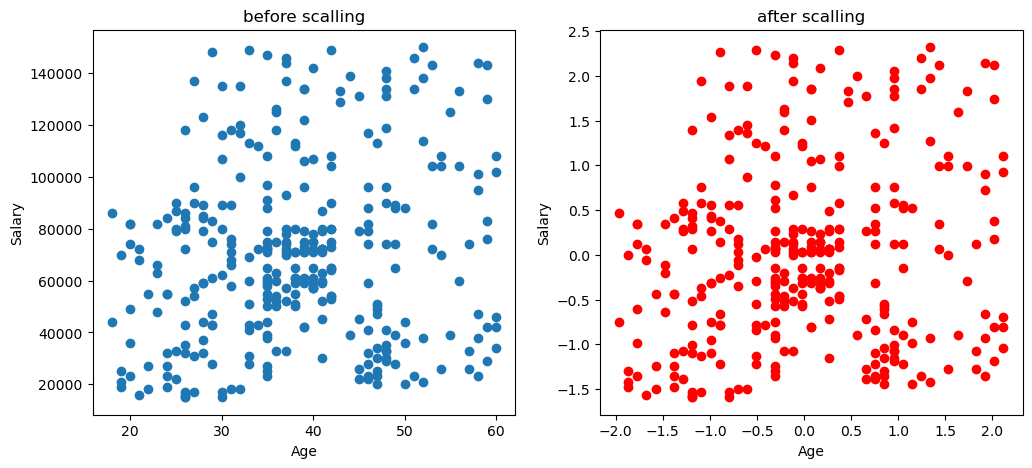

In [48]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('before scalling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Salary')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('after scalling')
ax2.set_xlabel('Age')
ax2.set_ylabel('Salary')

<Axes: title={'center': 'after scalling'}, xlabel='Age', ylabel='Density'>

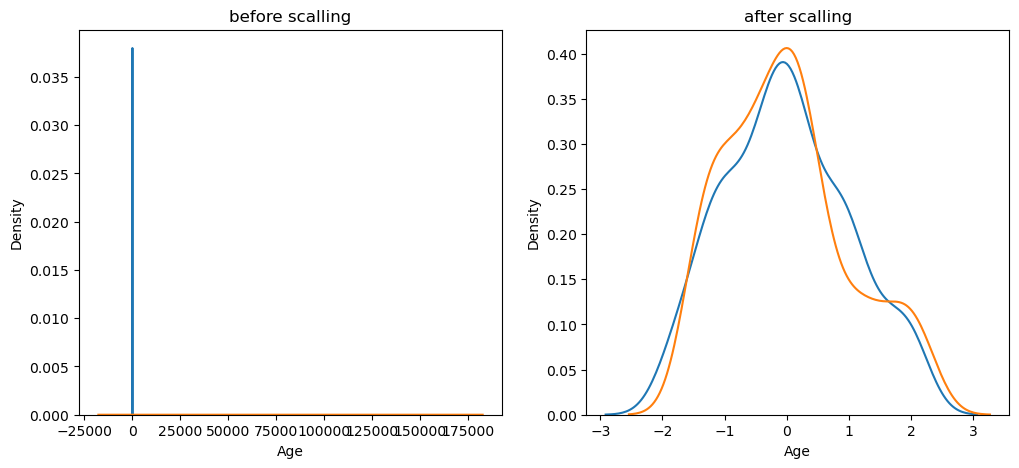

In [60]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scalling
ax1.set_title('before scalling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('after scalling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

## comparision of distribution


<Axes: title={'center': 'age distribution after scalling'}, xlabel='Age', ylabel='Density'>

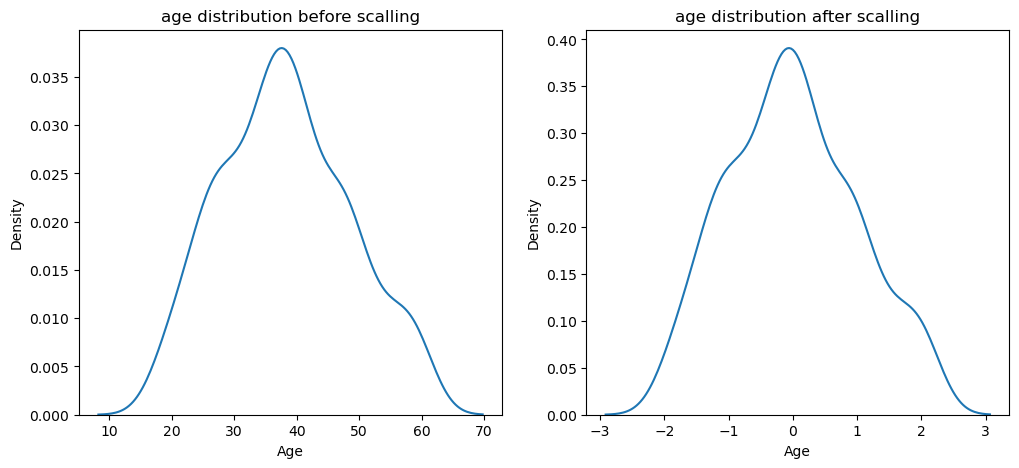

In [65]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('age distribution before scalling')
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title('age distribution after scalling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

<Axes: title={'center': 'salary distribution after scalling'}, xlabel='EstimatedSalary', ylabel='Density'>

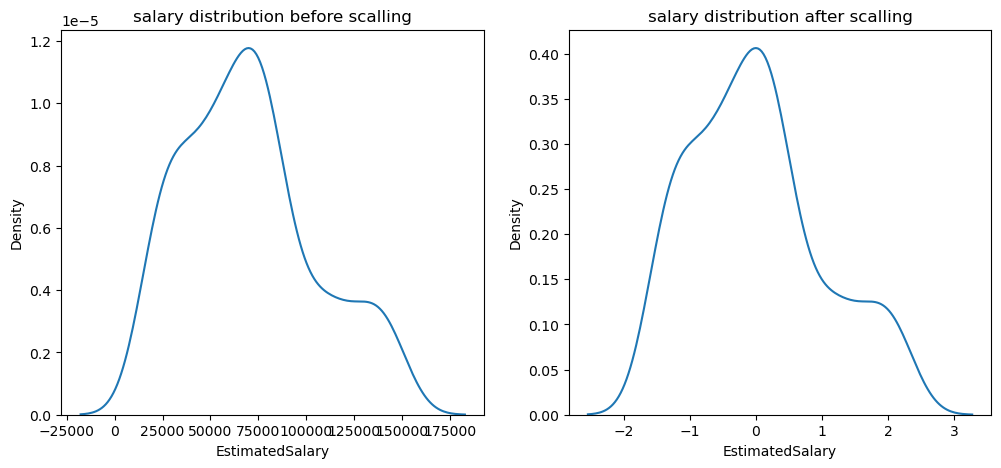

In [67]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('salary distribution before scalling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('salary distribution after scalling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)


In [68]:

from sklearn.linear_model import LogisticRegression


In [70]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [75]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)
print('model tained')


model tained


In [83]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [84]:
lr.score(X_train,y_train)

0.81875

In [87]:
lr_scaled.score(X_train_scaled,y_train)

0.821875

In [88]:
from sklearn.metrics import accuracy_score


In [89]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.925


In [90]:
from sklearn.tree import DecisionTreeClassifier


In [95]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [96]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [97]:
dt.score(X_train,y_train)

0.996875

In [106]:
dt_scaled.score(X_train_scaled,y_train)

0.996875

In [107]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
print('Actual',accuracy_score(y_test,y_pred))
print('scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
scaled 0.9


## Effect of outlier


In [115]:
df = pd.concat([
    df,
    pd.DataFrame({
        'Age': [5, 90, 95],
        'EstimatedSalary': [1000, 250000, 350000],
        'Purchased': [0, 1, 1]
    })
], ignore_index=True)


In [116]:
df.describe()

,Age,EstimatedSalary,Purchased
count,403.000000,403.000000,403.000000
mean,37.846154,70714.640199,0.359801
std,11.255343,37959.790969,0.480539
min,5.000000,1000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


In [118]:
df.shape

(403, 3)

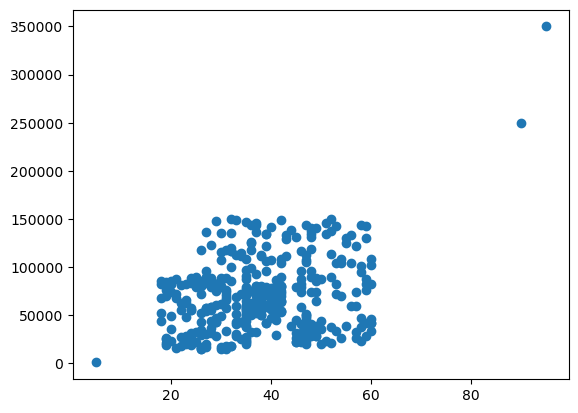

In [119]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [123]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
                                                       
                                                      df['Purchased'],
                                                      test_size=0.2,
                                                      random_state=0)

In [125]:
X_train.shape

(322, 2)

In [127]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [129]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

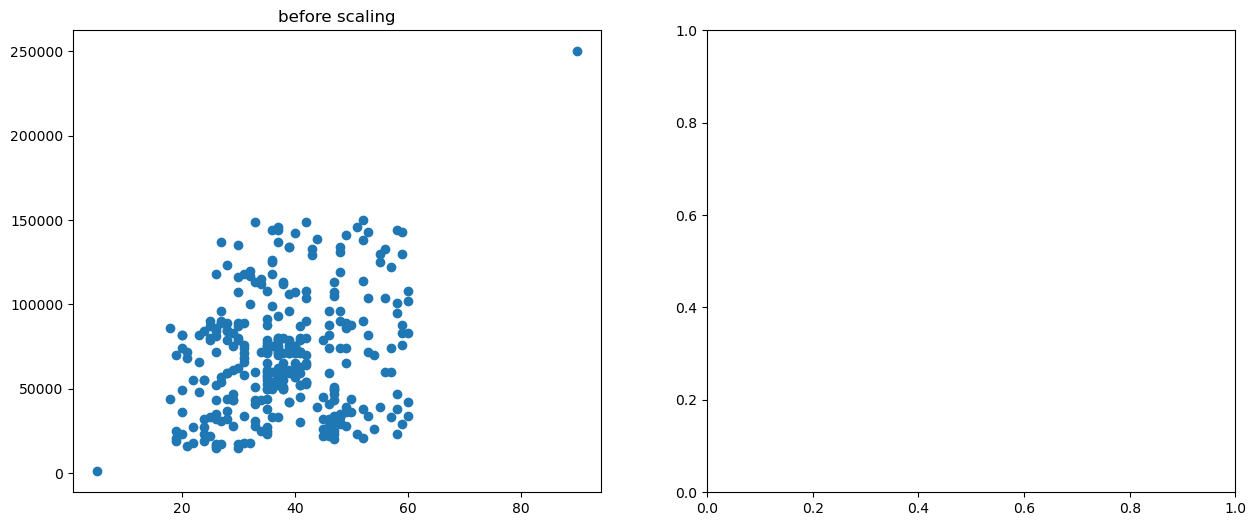

In [134]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,6))
ax1.set_title('before scaling')
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])

ax2.set_title('after scalling')
ax2.scatter(X_train-scaled['Age'],X_train_scaled)